# Feature Engineering

*once the data is processed, change the file name to the cleaned one*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# notebook configurations
pd.options.display.max_colwidth = 1000

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/amazon_products_sampled_raw.csv")
df.sample()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
15400,NAMDEV GEMS 5.25 Ratti / 4.75 Carat Yellow Sapphire Gemstone Unheated Untreated Certified Natural Pukhraj Stone,accessories,Jewellery,https://m.media-amazon.com/images/I/61JcNhjGqyL._AC_UL320_.jpg,https://www.amazon.in/NAMDEV-GEMS-Sapphire-Untreated-Certified/dp/B07QT7Z59N/ref=sr_1_17641?qid=1679145749&s=jewelry&sr=1-17641,3.5,4,₹499,"₹5,999"


## Text Features

In [3]:
df["word_count"] = df["name"].apply(lambda x: len(str(x).split()))

In [4]:
df["char_count"] = df["name"].apply(lambda x: len(str(x)))

In [5]:
# think of other stuff?

## Numerical Features

In [6]:
# this will already be taken care of in the clean file but for now leave this here
df["ratings"] = pd.to_numeric(df["ratings"], errors = "coerce")
df["no_of_ratings"] = pd.to_numeric(df["no_of_ratings"], errors = "coerce")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217662 entries, 0 to 217661
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            217662 non-null  object 
 1   main_category   217662 non-null  object 
 2   sub_category    217662 non-null  object 
 3   image           217662 non-null  object 
 4   link            217662 non-null  object 
 5   ratings         147988 non-null  float64
 6   no_of_ratings   135261 non-null  float64
 7   discount_price  189546 non-null  object 
 8   actual_price    211088 non-null  object 
 9   word_count      217662 non-null  int64  
 10  char_count      217662 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 18.3+ MB


In [8]:
df["mean_rating"] = df.groupby("main_category")["ratings"].transform("mean")

In [9]:
df["rating_variance"] = df.groupby("main_category")["ratings"].transform("var")

In [10]:
df["positive_negative_ratio"] = df.groupby("main_category")["ratings"].apply(lambda x: (x.fillna(-1).replace(np.inf, -1).astype(int) > 3).sum() / len(x) if len(x) > 0 else 0).fillna(0)

> The positive-negative ratio, calculated based on ratings, provides insights into the balance of positive and negative ratings in the dataset. It can be expressed as:
$$
\text{Positive-Nagative Ratio} = \frac{{\text{Number of Positive Ratings}}}{{\text{Number of Negative Ratings}}}$$
The positive-negative ratio helps assess the distribution of ratings and its impact on classifying product categories. A high ratio indicates a predominance of positive ratings, potentially biasing the model towards positive categories. Conversely, a low ratio suggests a higher proportion of negative ratings, which may affect the model's accuracy in classifying positive categories.

Let's check for imbalance in the ratio.

>Checking for imbalance in the positive and negative ratings allows for identification of potential biases and helps ensure fair representation in the classification of product categories.

In [11]:
df["positive_negative_ratio"][df["positive_negative_ratio"].notnull()]

Series([], Name: positive_negative_ratio, dtype: float64)

In [12]:
imbalance_ratio = df['positive_negative_ratio']
imbalance_ratio

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
217657   NaN
217658   NaN
217659   NaN
217660   NaN
217661   NaN
Name: positive_negative_ratio, Length: 217662, dtype: float64

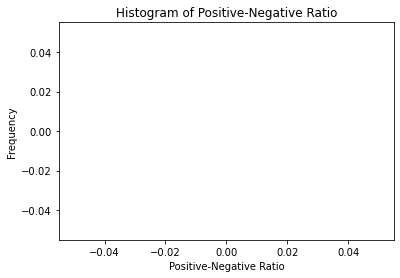

In [13]:
df2 = df.copy()
positive_negative_ratio_data = df2['positive_negative_ratio'].dropna()

# Plot a histogram
plt.hist(positive_negative_ratio_data, bins=20, density=True)
plt.xlabel('Positive-Negative Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Positive-Negative Ratio')

# Plot a probability plot (also known as a Q-Q plot)
stats.probplot(positive_negative_ratio_data, plot=plt)

plt.show()

In [14]:
#... means its all null values? weird fix later